# Data Wrangling and Analysis: @WeRateDogs Tweets

In [1]:
# import needed libraries
import pandas as pd 
import numpy as np 
import requests 
import tweepy 
import json 
import matplotlib.pyplot as plt 
from timeit import default_timer as timer 
import os

%matplotlib inline

## 1. Gathering Data

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Requesting tweet image predictions

with open('image_predictions.tsv' , 'wb') as file:
    image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
    file.write(image_predictions.content)

In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# extract data from Tweepy

consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [6]:
fails = [] # for error/exception messages

with open('tweet_json.txt', 'w') as file:
    for tweet_id in list(archive['tweet_id']):
        try:
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except tweepy.TweepError as e:
            fails.append(tweet_id)

In [7]:
tweets = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [8]:
tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


## 2. Assessing Data

### Visual Assessment

In [9]:
archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


### Programmtic Assessment

In [12]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     1776 non-null   datetime64[ns, UTC]
 1   id                             1776 non-null   int64              
 2   id_str                         1776 non-null   int64              
 3   full_text                      1776 non-null   object             
 4   truncated                      1776 non-null   bool               
 5   display_text_range             1776 non-null   object             
 6   entities                       1776 non-null   object             
 7   extended_entities              1555 non-null   object             
 8   source                         1776 non-null   object             
 9   in_reply_to_status_id          67 non-null     float64            
 10  in_reply_to_status_id_st

In [15]:
assert [archive.duplicated() == False]

In [16]:
assert [image_predictions.duplicated() == False]

In [17]:
assert [tweets.id.duplicated() == False]

no duplicates 

In [18]:
type(archive.timestamp)

pandas.core.series.Series

In [19]:
archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Goliath      1
Godi         1
Brownie      1
Chase        1
Bradley      1
Name: name, Length: 957, dtype: int64

In [20]:
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### Tidiness Issues

1. The columns (doggo, floofer, pupper and puppo) do not need to be separated. Each dog will be classified as one of these classifications, so should be collapsed into one column.
2. All of dataframes should be merged into one, since they hold information about the same context.


#### Quality Issues

1. Drop unneeded columns in the dataframes like source, img_num, expanded_urls, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, and in_reply_to_user_id. 
2. Change data type of timestamp column as well as column tweet_id is int, change to type object as no calculation is needed.
3. Rename the column id to be tweet_id to facilitate merging in tweets dataframe.
4. The name column has invalid data for a name, such as "a".
5. For the column “rating_denominator” there is a zero value that should be removed.
6. Remove retweets.
7. p1,p2,p3 columns dog breeds are inconsistent in lower/upper case.
8. Remove tweets that are not rating (tweets without images).

## 3. Cleaning Data

Cleaning steps are: defining, coding, and testing

- Starting with Quality Issues:

In [21]:
# make copies of dataframes to prepare cleaning
cleaned_archive = archive.copy()
cleaned_predictions = image_predictions.copy()
cleaned_tweets = tweets.copy()

In [22]:
# Define: Dropping unneded columns.

# Code:
cleaned_archive = cleaned_archive.drop(['expanded_urls','source','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
cleaned_predictions = cleaned_predictions.drop(['img_num'], axis=1)

In [23]:
# Define: filter/select needed columns instead of dropping for tweets df
# Code:
cleaned_tweets = cleaned_tweets.filter(['id','favorite_count','retweet_count'])

In [24]:
# Test:
cleaned_tweets.columns

Index(['id', 'favorite_count', 'retweet_count'], dtype='object')

In [25]:
cleaned_archive.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [26]:
cleaned_predictions.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [27]:
# - Change data type timestamp 
# - Column tweet_id is int, change to type object as no calculation is needed.
# Define: Change data type of some columns
#Code:
cleaned_archive['timestamp'] = pd.to_datetime(cleaned_archive.timestamp)
cleaned_archive['name'] = cleaned_archive['name'].astype(str)
cleaned_archive['tweet_id'] = cleaned_archive['tweet_id'].astype(str)

cleaned_predictions['tweet_id'] = cleaned_predictions['tweet_id'].astype(str)
cleaned_predictions['p1'] = cleaned_predictions['p1'].astype(str)
cleaned_predictions['p2'] = cleaned_predictions['p2'].astype(str)
cleaned_predictions['p3'] = cleaned_predictions['p3'].astype(str)

cleaned_tweets['id'] = cleaned_tweets['id'].astype(str)

In [28]:
# Test:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   int64              
 5   name                2356 non-null   object             
 6   doggo               2356 non-null   object             
 7   floofer             2356 non-null   object             
 8   pupper              2356 non-null   object             
 9   puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 184.2+ KB


In [29]:
# Test:
cleaned_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 135.9+ KB


In [30]:
# Test:
cleaned_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1776 non-null   object
 1   favorite_count  1776 non-null   int64 
 2   retweet_count   1776 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 41.8+ KB


In [31]:
cleaned_archive.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [32]:
# Define: Rename the column id to tweet_id to match the other two dataframes
# Code: 
cleaned_tweets.rename(columns = {'id':'tweet_id'}, inplace = True)

In [33]:
# Test:
cleaned_tweets.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

In [34]:
# Define: Fix invalid data for a name, such as "a".
# Code:
# inspiration: https://github.com/StefaniePowazny/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
def get_name(row):
    words = row['text'].split()
    
    name = 'None'
    
    if 'named' in words:
        name = words[words.index('named') + 1]
    elif row['text'].startswith('This is ') and words[row['text'].index('This is') + 2] != 'a' and words[row['text'].index('This is') + 2] != 'an':
        name = words[row['text'].index('This is') + 2]
    elif row['text'].startswith('Say hello to'):
        name = words[row['text'].index('Say hello to') + 3]
    elif 'Meet' in words:
        name = words[words.index('Meet') + 1]
            
    row['name'] = name.replace('.','')
    
    return row
    
cleaned_archive = cleaned_archive.apply(get_name, axis=1)

In [35]:
# Test: 
cleaned_archive.name.value_counts()

None       904
Charlie     11
Lucy        11
Oliver      10
Cooper      10
          ... 
Hall         1
Amber        1
Marvin       1
Nimbus       1
Bradley      1
Name: name, Length: 967, dtype: int64

In [36]:
# Define: For the column “rating_denominator” there is a zero value that should be removed
# Code:
cleaned_archive = cleaned_archive[cleaned_archive['rating_denominator'] != 0 ]

In [37]:
# Test:
len(cleaned_archive[cleaned_archive['rating_denominator'] == 0 ])

0

In [39]:
# Define: Remove retweets
# Code:
archive['retweeted_status_id'] = archive['retweeted_status_id'].astype(str)
retweets = archive[archive["retweeted_status_id"]!="nan"]["tweet_id"].index # since we dropped these columns from the clean df
cleaned_archive.drop(retweets, inplace=True)

KeyError: '[  19   32   36   68   73   74   78   91   95   97  101  109  118  124\n  130  132  137  146  155  159  160  165  171  180  182  185  194  195\n  204  211  212  222  230  231  247  250  260  266  272  273  281  285\n  286  289  298  302  303  307  309  310  319  327  332  340  341  343\n  357  359  366  382  386  397  399  406  411  415  420  422  425  431\n  434  435  438  446  447  450  453  455  462  465  469  475  476  479\n  485  488  506  522  530  535  538  541  543  546  552  555  558  561\n  566  568  574  577  581  583  586  589  594  595  596  597  598  599\n  600  601  602  603  604  605  606  612  615  618  627  629  634  654\n  655  656  661  664  669  671  677  682  686  692  694  702  720  728\n  741  742  745  749  753  759  764  767  770  773  778  784  794  800\n  811  815  818  822  826  829  833  841  847  860  868  872  885  890\n  895  908  911  926  937  943  949 1012 1023 1043 1242 2259 2260] not found in axis'

In [40]:
# Test:
cleaned_archive['tweet_id'].nunique()

2174

In [41]:
# Define: p1,p2,p3 columns dog breeds are inconsistent in lower/upper case
# Code:
cleaned_predictions['p1'] = cleaned_predictions['p1'].str.lower()
cleaned_predictions['p2'] = cleaned_predictions['p2'].str.lower()
cleaned_predictions['p3'] = cleaned_predictions['p3'].str.lower()

In [42]:
# Test
cleaned_predictions['p1'].str.isupper().any()

False

In [43]:
# Test
cleaned_predictions['p2'].str.isupper().any() & cleaned_predictions['p3'].str.isupper().any()

False

In [44]:
# Define: Remove tweets that are not rating (tweets without images)
# Code:
cleaned_predictions = cleaned_predictions[pd.notnull(cleaned_predictions['jpg_url'])]

In [45]:
# Test:
len(cleaned_predictions[pd.isnull(cleaned_predictions['jpg_url'])])

0

In [46]:
# extract the decimal ratings with regular expressions
cleaned_archive[cleaned_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/Users/linaalkhodair/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


- Moving on to Tidiness Issues:

In [47]:
# Define: The columns (doggo, floofer, pupper and puppo) do not need to be separated. Each dog will be classified as one of these classifications, so should be collapsed into one column
# Code:
cleaned_archive.loc[cleaned_archive['doggo'] == 'doggo', 'dog_class'] = 'doggo'
cleaned_archive.loc[cleaned_archive['floofer'] == 'floofer', 'dog_class'] = 'floofer'
cleaned_archive.loc[cleaned_archive['pupper'] == 'pupper', 'dog_class'] = 'pupper'
cleaned_archive.loc[cleaned_archive['puppo'] == 'puppo', 'dog_class'] = 'puppo'

In [48]:
cleaned_archive['dog_class'].value_counts()

pupper     234
doggo       75
puppo       25
floofer     10
Name: dog_class, dtype: int64

In [56]:
# For dog class, there are some rows with multiple dog classes:
# handle none
cleaned_archive.doggo.replace('None', '', inplace=True)
cleaned_archive.floofer.replace('None', '', inplace=True)
cleaned_archive.pupper.replace('None', '', inplace=True)
cleaned_archive.puppo.replace('None', '', inplace=True)

# merge into column
cleaned_archive['dog_class'] = cleaned_archive.doggo + cleaned_archive.floofer + cleaned_archive.pupper + cleaned_archive.puppo

# handle multiple stages
cleaned_archive.loc[cleaned_archive.dog_class == 'doggopupper', 'dog_class'] = 'doggo, pupper'
cleaned_archive.loc[cleaned_archive.dog_class == 'doggopuppo', 'dog_class'] = 'doggo, puppo'
cleaned_archive.loc[cleaned_archive.dog_class == 'doggofloofer', 'dog_class'] = 'doggo, floofer'

# handle missing values
cleaned_archive.loc[cleaned_archive.dog_class == '', 'dog_class'] = np.nan

AttributeError: 'DataFrame' object has no attribute 'doggo'

In [52]:
cleaned_archive = cleaned_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [58]:
# Test:
cleaned_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2174 non-null   object             
 1   timestamp           2174 non-null   datetime64[ns, UTC]
 2   text                2174 non-null   object             
 3   rating_numerator    2174 non-null   int64              
 4   rating_denominator  2174 non-null   int64              
 5   name                2174 non-null   object             
 6   dog_class           344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 215.9+ KB


In [59]:
# Define: All of dataframes should be merged into one, since they hold information about the same context
# Code:
# Merge 3 dataframes into a new dataframe using inner join
complete_df = pd.merge(cleaned_predictions, cleaned_archive, on='tweet_id', how='inner')
cleaned_dataset = pd.merge(complete_df, cleaned_tweets, on='tweet_id', how='inner')

In [60]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1489
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1490 non-null   object             
 1   jpg_url             1490 non-null   object             
 2   p1                  1490 non-null   object             
 3   p1_conf             1490 non-null   float64            
 4   p1_dog              1490 non-null   bool               
 5   p2                  1490 non-null   object             
 6   p2_conf             1490 non-null   float64            
 7   p2_dog              1490 non-null   bool               
 8   p3                  1490 non-null   object             
 9   p3_conf             1490 non-null   float64            
 10  p3_dog              1490 non-null   bool               
 11  timestamp           1490 non-null   datetime64[ns, UTC]
 12  text                1490 non-null 

In [77]:
cleaned_dataset.to_csv('twitter_archive_master.csv')

# Analysing and Visualising Data

In [62]:
df = cleaned_dataset.copy()
df.describe()

,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator,favorite_count,retweet_count
count,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000,1490.000000
mean,0.589276,0.135323,6.065005e-02,11.451678,10.354362,9141.131544,2585.782550
std,0.273147,0.100172,5.042916e-02,12.717761,5.637523,12336.899801,4093.207994
min,0.055379,0.000018,2.160900e-07,0.000000,7.000000,185.000000,29.000000
25%,0.354756,0.055559,1.648673e-02,10.000000,10.000000,1640.750000,530.250000
50%,0.584919,0.119775,5.055980e-02,11.000000,10.000000,3938.500000,1286.500000
75%,0.839121,0.195138,9.365467e-02,12.000000,10.000000,12357.500000,3111.750000
max,0.999956,0.467678,2.551820e-01,420.000000,130.000000,129677.000000,54813.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 1489
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1490 non-null   object             
 1   jpg_url             1490 non-null   object             
 2   p1                  1490 non-null   object             
 3   p1_conf             1490 non-null   float64            
 4   p1_dog              1490 non-null   bool               
 5   p2                  1490 non-null   object             
 6   p2_conf             1490 non-null   float64            
 7   p2_dog              1490 non-null   bool               
 8   p3                  1490 non-null   object             
 9   p3_conf             1490 non-null   float64            
 10  p3_dog              1490 non-null   bool               
 11  timestamp           1490 non-null   datetime64[ns, UTC]
 12  text                1490 non-null 

### 1. Which month has the highest number of Tweets ?

In [64]:
df['timestamp'].apply(lambda x: x.strftime('%m')).value_counts().sort_index()

01    235
02    174
03     52
04     41
05     43
06     43
07     58
08     61
09     62
10     65
11    236
12    420
Name: timestamp, dtype: int64

December has the highest total number of tweets

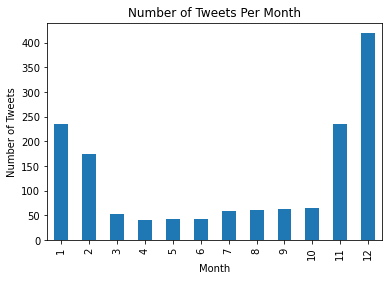

In [65]:
tweet_month = df['tweet_id'].groupby([df['timestamp'].dt.month]).count()
tweet_month.plot(kind='bar')
plt.title('Number of Tweets Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.savefig('tweets_per_month');

### 2. Top 5 most frequent dog names

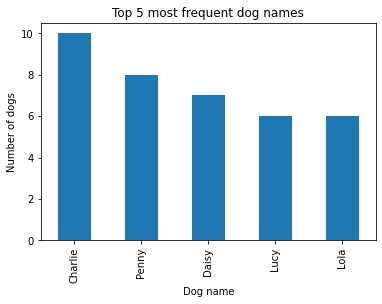

In [66]:
selection = df[df['name'] != "None"]
selection['name'].value_counts()[0:5].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of dogs')
plt.title('Top 5 most frequent dog names')
plt.xlabel('Dog name')
plt.savefig('top_frequent_names');

### 3. Comparison of retweet count vs favorite count distribution

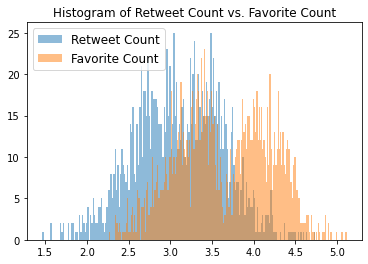

In [67]:
retweets = df['retweet_count'].apply(lambda x: np.log10(x))
favorites = df['favorite_count'].apply(lambda x: np.log10(x))
plt.hist(retweets, alpha=0.5, bins=200, label='Retweet Count')
plt.hist(favorites, alpha=0.5, bins=200, label='Favorite Count')
plt.title('Histogram of Retweet Count vs. Favorite Count')
plt.legend(loc='upper left', fontsize=12)
plt.savefig('retweet_favorite_hist');

We can see that favorite count is increasing. So, we can observe that users favor tweets more that retweeting.

### 4. What is most recurring dog class ?

In [68]:
import seaborn as sns

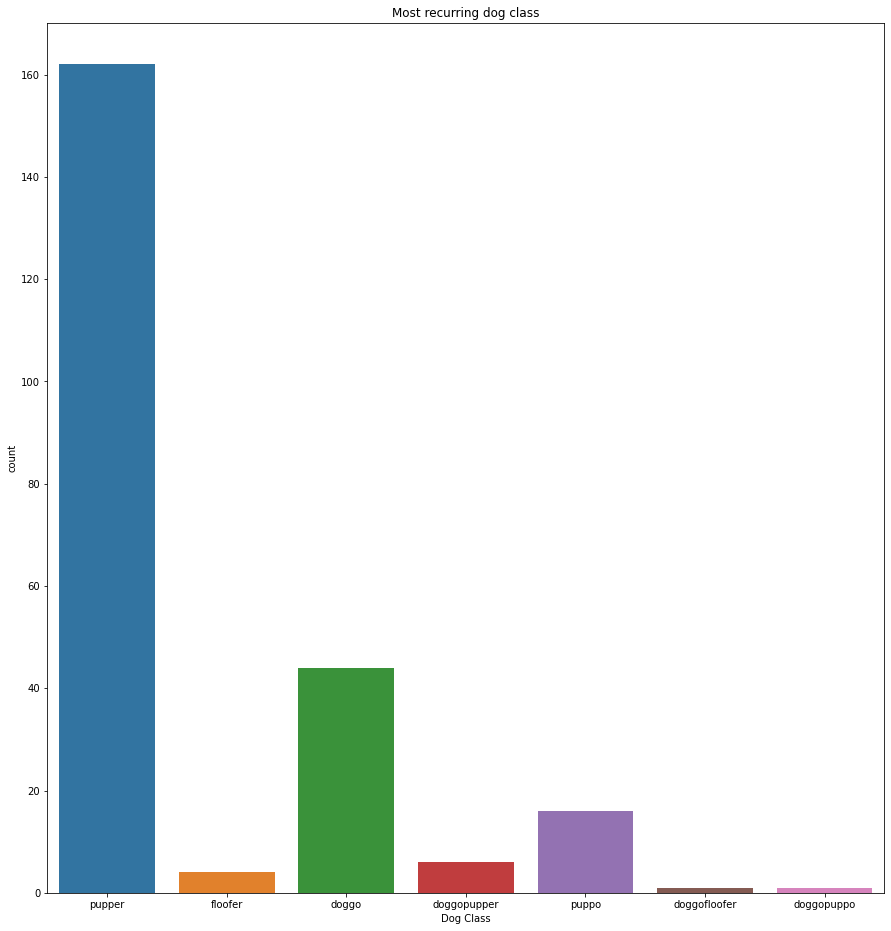

In [76]:
plt.figure(figsize=(15,16))
sns.countplot(data=df, x='dog_class')
plt.title('Most recurring dog class')
plt.xlabel('Dog Class')
plt.savefig('dog_classes');